In [2]:
import seaborn as sns
import pandas as pd
import csv
import numpy as np

In [ ]:
def load_zeroshot_dataframe():
    general_datasets = ["ImageNet", "CIFAR10", "CIFAR100", "Caltech101", "Caltech256", "STL10"]
    fine_grained_datasets = ["DTD", "OxfordIIITPet", "StanfordCars", "FGVCAircraft", "Food101", "Places365"]
    metric = "Top1Accuracy"
    model_scores = pd.read_csv("/home/phisch/multimodal/model_scores.csv")
    plot_data_general, plot_data_fine = {}, {}

    file_path = "/home/phisch/multimodal/models.csv"
    with open(file_path, newline='') as models_csv:
        models_reader = csv.DictReader(models_csv)
        for models_row in models_reader:
            model_name = models_row["model_name"]
            print(model_name)
            values_general = []
            values_fine = []
            dataset_sizes = list(models_row.keys())
            dataset_sizes.remove("model_name")
            for size in dataset_sizes:
                model_id = models_row[size]
                scores = model_scores.loc[(model_scores["model_id"] == model_id) & 
                                (model_scores["metric"] == metric), "score"]
                score_global = np.mean([model_scores.loc[(model_scores["model_id"] == model_id) & 
                                                    (model_scores["dataset"] == ds) & 
                                                    (model_scores["metric"] == metric), "score"].item() 
                                    for ds in general_datasets])
                score_local = np.mean([model_scores.loc[(model_scores["model_id"] == model_id) & 
                                                    (model_scores["dataset"] == ds) & 
                                                    (model_scores["metric"] == metric), "score"].item() 
                                    for ds in fine_grained_datasets])
            plot_data_global[model_name] = values_global
            plot_data_local[model_name] = values_local
    

In [ ]:
reader = csv.

#### Test sns.lmplot()

In [3]:
import seaborn as sns
sns.set_theme()

In [4]:
# Load the penguins dataset
penguins = sns.load_dataset("penguins")

In [5]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


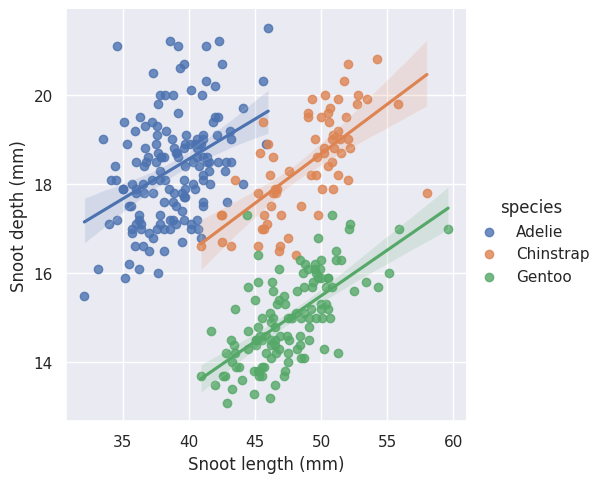

In [11]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)
# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

#### Append columns for model name/description and training data fraction to model_scores.csv

In [12]:
import pandas as pd
import yaml

# Load the CSV file into a DataFrame
df = pd.read_csv("/home/phisch/multimodal/model_scores.csv")

# Load the YAML file
with open("/home/phisch/multimodal/configs/checkpoints/model_id_mapping.yaml", 'r') as file:
    mapping = yaml.safe_load(file)

# Create lists to store the new column values
model_names = []
dataset_fractions = []

# Iterate over the model_id column in the DataFrame
for model_id in df['model_id']:
    model_info = mapping.get(model_id, {})
    model_names.append(model_info.get('name', 'Unknown'))
    dataset_fractions.append(model_info.get('subset_fraction', 0))

# Add the new columns to the DataFrame
df['model_name'] = model_names
df['dataset_fraction'] = dataset_fractions

print(df)

      model_id     dataset    method        metric     score method_notes  \
0     93t3xgrr  Caltech101  zeroshot  Top1Accuracy  0.474715  1_templates   
1     93t3xgrr  Caltech101  zeroshot  Top3Accuracy  0.702204  1_templates   
2     93t3xgrr  Caltech101  zeroshot  Top5Accuracy  0.767325  1_templates   
3     93t3xgrr  Caltech256  zeroshot  Top1Accuracy  0.346539  1_templates   
4     93t3xgrr  Caltech256  zeroshot  Top3Accuracy  0.500511  1_templates   
...        ...         ...       ...           ...       ...          ...   
1291  08q77hgf   Places365  zeroshot  Top3Accuracy  0.007534  1_templates   
1292  08q77hgf   Places365  zeroshot  Top5Accuracy  0.012164  1_templates   
1293  03avtdyk   Places365  zeroshot  Top1Accuracy  0.002110  1_templates   
1294  03avtdyk   Places365  zeroshot  Top3Accuracy  0.007178  1_templates   
1295  03avtdyk   Places365  zeroshot  Top5Accuracy  0.011370  1_templates   

      dataset_notes    model_name  dataset_fraction  
0               NaN  

In [15]:
df[df["dataset_fraction"] == 0.8]

,model_id,dataset,method,metric,score,method_notes,dataset_notes,model_name,dataset_fraction
180,2udboe06,Caltech101,zeroshot,Top1Accuracy,0.395044,1_templates,NaN,CLIP + ITM,0.8
181,2udboe06,Caltech101,zeroshot,Top3Accuracy,0.627143,1_templates,NaN,CLIP + ITM,0.8
182,2udboe06,Caltech101,zeroshot,Top5Accuracy,0.699899,1_templates,NaN,CLIP + ITM,0.8
183,2udboe06,Caltech256,zeroshot,Top1Accuracy,0.310476,1_templates,NaN,CLIP + ITM,0.8
184,2udboe06,Caltech256,zeroshot,Top3Accuracy,0.454809,1_templates,NaN,CLIP + ITM,0.8
...,...,...,...,...,...,...,...,...,...
1255,dsp551hg,Places365,zeroshot,Top3Accuracy,0.297260,1_templates,NaN,CLIP,0.8
1256,dsp551hg,Places365,zeroshot,Top5Accuracy,0.373589,1_templates,NaN,CLIP,0.8
1257,e2kwl0iu,Places365,zeroshot,Top1Accuracy,0.003479,1_templates,NaN,SimCLR,0.8
1258,e2kwl0iu,Places365,zeroshot,Top3Accuracy,0.009425,1_templates,NaN,SimCLR,0.8


In [16]:
df.to_csv("/home/phisch/multimodal/models_new.csv", index=False)

In [6]:
import yaml

# Load the YAML file
# Load the YAML file
with open('/home/phisch/multimodal/configs/checkpoints/model_id_mapping.yaml', 'r') as file:
    mapping = yaml.safe_load(file)

# Extract model IDs with the specified attribute
model_ids_to_update = [model_id for model_id, model_info in mapping.items() if model_info.get('image_encoder') == 'google/vit-base-patch16-384']

In [8]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/home/phisch/multimodal/model_scores.csv')

# Update the dataset_fraction value for the specified models
df.loc[df['model_id'].isin(model_ids_to_update), 'dataset_fraction'] = 1.384

# Save the updated DataFrame back to the CSV file
df.to_csv('/home/phisch/multimodal/model_scores_new.csv', index=False)

#### ..

In [17]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/home/phisch/multimodal/model_scores.csv')

In [18]:
# Define the two lists of datasets
list1 = ['Caltech101', 'CIFAR10', 'DTD']
list2 = ['Caltech256', 'CIFAR100', 'FGVCAircraft']

# Select the metric for which you want to calculate the mean
selected_metric = 'Top1Accuracy'

In [20]:
# Filter the DataFrame based on the selected metric
df_filtered = df[df['metric'] == selected_metric]

# Calculate the mean scores for each model for the datasets in list1
mean_scores_list1 = df_filtered[df_filtered['dataset'].isin(list1)].groupby('model_id')
mean_scores_list1


In [ ]:
mean_scores_list1.rename(columns={'score': 'mean_score_list1'}, inplace=True)

# Calculate the mean scores for each model for the datasets in list2
mean_scores_list2 = df_filtered[df_filtered['dataset'].isin(list2)].groupby('model_id')['score'].mean().reset_index()
mean_scores_list2.rename(columns={'score': 'mean_score_list2'}, inplace=True)

# Merge the mean scores with the original DataFrame to include all other columns
mean_scores = pd.merge(mean_scores_list1, mean_scores_list2, on='model_id', how='outer')

# Merge the mean scores with the original DataFrame to include all other columns
result_df = pd.merge(df, mean_scores, on='model_id', how='left')

print(result_df)

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/home/phisch/multimodal/model_scores_linear_probe_new.csv')

# Define the two lists of datasets
general_datasets = ["ImageNet", "CIFAR10", "CIFAR100", "Caltech101", "Caltech256", "STL10"]
fine_grained_datasets = ["DTD", "OxfordIIITPet", "StanfordCars", "FGVCAircraft", "Food101", "Places365"]

# Select the metric for which you want to calculate the mean
selected_metric = 'Top1Accuracy'

# Filter the DataFrame based on the selected metric
df_filtered = df[df['metric'] == selected_metric]

# Calculate the mean scores for each model for the datasets in list1
mean_scores_general = df_filtered[df_filtered['dataset'].isin(general_datasets)].groupby('model_id')['score'].mean().reset_index()
mean_scores_general['dataset'] = 'general_datasets'
mean_scores_general['metric'] = selected_metric

# Calculate the mean scores for each model for the datasets in list2
mean_scores_fine = df_filtered[df_filtered['dataset'].isin(fine_grained_datasets)].groupby('model_id')['score'].mean().reset_index()
mean_scores_fine['dataset'] = 'fine_grained_datasets'
mean_scores_fine['metric'] = selected_metric

# Combine the mean scores into a single DataFrame
mean_scores = pd.concat([mean_scores_general, mean_scores_fine], ignore_index=True)

# Merge the mean scores with the original DataFrame to include all other columns
result_df = pd.merge(df.drop(columns=['dataset', 'metric', 'score']), mean_scores, on='model_id', how='right')
# Drop rows where model_name is "SimCLR" or "SimCLR + ITM"
result_df = result_df[~result_df['model_name'].isin(["SimCLR", "SimCLR + ITM"])]
# Replace dataset_fraction=1.384 with 1.2 to ensure a consistent scale in x ticks
result_df['dataset_fraction'] = result_df['dataset_fraction'].replace(1.384, 1.2)

# Drop duplicate rows and reset index
result_df = result_df.drop_duplicates().reset_index(drop=True)

result_df

,model_id,method,method_notes,dataset_notes,model_name,dataset_fraction,score,dataset,metric
0,1j1wb3o6,zeroshot,1_templates,NaN,CLIP + SimCLR,0.8,0.322409,general_datasets,Top1Accuracy
1,2k0xgnrt,zeroshot,1_templates,NaN,CLIP + SimCLR + ITM,0.8,0.327156,general_datasets,Top1Accuracy
2,2udboe06,zeroshot,1_templates,NaN,CLIP + ITM,0.8,0.322780,general_datasets,Top1Accuracy
3,3b3zvcnp,zeroshot,1_templates,NaN,CLIP + SimCLR + ITM,0.4,0.257977,general_datasets,Top1Accuracy
4,5ib9fce5,zeroshot,1_templates,NaN,CLIP + SimCLR,0.4,0.255005,general_datasets,Top1Accuracy
5,6gvnn76i,zeroshot,1_templates,NaN,CLIP,1.2,0.360541,general_datasets,Top1Accuracy
6,6z9rakfu,zeroshot,1_templates,NaN,CLIP,0.4,0.264057,general_datasets,Top1Accuracy
7,93t3xgrr,zeroshot,1_templates,NaN,CLIP + ITM,1.0,0.361446,general_datasets,Top1Accuracy
8,95qxia4w,zeroshot,1_templates,NaN,CLIP + SimCLR + ITM,0.6,0.297781,general_datasets,Top1Accuracy
9,9nvg456i,zeroshot,1_templates,NaN,CLIP + SimCLR + ITM,1.0,0.373105,general_datasets,Top1Accuracy


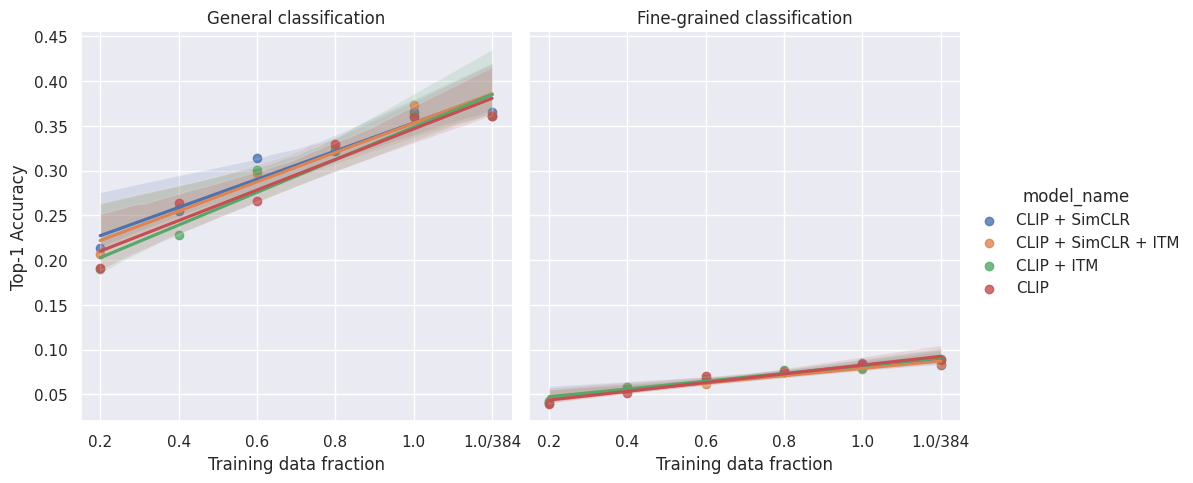

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

g = sns.lmplot(
    data=result_df,
    x="dataset_fraction", y="score", hue="model_name", col="dataset",
    # height=3
)
g.set_axis_labels("Training data fraction", "Top-1 Accuracy")

# Custom x-ticks
new_labels = ["0.2", "0.4", "0.6", "0.8", "1.0", "1.0/384"]  # Replace with your desired labels
g.set(xticks=[0.2, 0.4, 0.6, 0.8, 1.0, 1.2])  # Replace with your desired tick positions
for ax in g.axes.flat:
    ax.set_xticklabels(new_labels)

# Custom subplot titles
titles = ['General classification', 'Fine-grained classification']  # Replace with your desired titles
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# Add a textbox
legend_datasets = "'ImageNet', 'CIFAR10', 'CIFAR100', 'Caltech101', 'Caltech256', 'STL10',
                   'DTD', 'OxfordIIITPet', 'StanfordCars', 'FGVCAircraft', 'Food101', 'Places365'"
plt.gcf().text(0.95, 0.5, 'Your Text Here', fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

plt.show()